**Importing the Dependencies**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
tf.random.set_seed(0)   # Creating Reproduceable Seed
from tensorflow.keras import datasets   # Importing the Datasets
from tensorflow.keras.utils import to_categorical   # For one-hot encoding

**Image Data Preparation**

In [2]:
# Loading the datasets
# MNIST Handwritten Digits
# CIFAR-10

(x_train_digits, y_train_digits), (x_test_digits, y_test_digits) = datasets.mnist.load_data()
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
# Shape of the datasets
print(x_train_digits.shape, y_train_digits.shape, x_test_digits.shape, y_test_digits.shape)
print(x_train_cifar.shape, y_train_cifar.shape, x_test_cifar.shape, y_test_cifar.shape)
print(x_train_digits[0].shape, x_test_digits[0].shape)
print(x_train_cifar[0].shape, x_test_cifar[0].shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
(28, 28) (28, 28)
(32, 32, 3) (32, 32, 3)


**70,000 Grayscale Images --> MNIST Handwritten Dataset**

**60,000 RGB Images --> CIFAR-10**

In [4]:
# Create a function to convert the CIFAR to Grayscale and Resize to 28,28
'''
def preprocess_images(images, size=(28, 28)):
    gray_images = []
    for img in images:
        # Convert RGB to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        # Resize the image
        resized = cv2.resize(gray, size)
        gray_images.append(resized)
    return np.array(gray_images)

x_train_cifar = preprocess_images(x_train_cifar)
x_test_cifar = preprocess_images(x_test_cifar)
'''

'\ndef preprocess_images(images, size=(28, 28)):\n    gray_images = []\n    for img in images:\n        # Convert RGB to grayscale\n        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)\n        # Resize the image\n        resized = cv2.resize(gray, size)\n        gray_images.append(resized)\n    return np.array(gray_images)\n\nx_train_cifar = preprocess_images(x_train_cifar)\nx_test_cifar = preprocess_images(x_test_cifar)\n'

In [5]:
# Defining the Classes
handwritten_digits = {
                        0:'0', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8', 9:'9'
}

cifar = {
          0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'
}

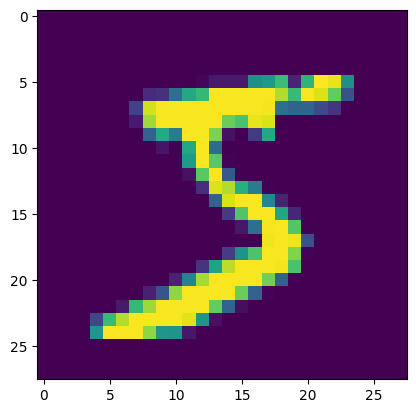

Label: 5


In [6]:
# Visualizing some samples of the datasets
plt.imshow(x_train_digits[0])
plt.show()
cv2_imshow(x_train_digits[0])
print('Label:', y_train_digits[0])

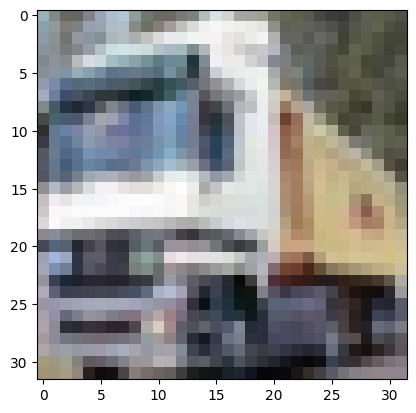

[9]
Label: truck


In [7]:
plt.imshow(x_train_cifar[1])
plt.show()
print(y_train_cifar[1])
print('Label:', cifar[9])

In [8]:
# Normalizing the dataset from 0 to 1
#Digits
x_train_digits = x_train_digits.astype('float32') / 255.0
x_test_digits = x_test_digits.astype('float32') / 255.0

#Cifar
x_train_cifar = x_train_cifar.astype('float32') / 255.0
x_test_cifar = x_test_cifar.astype('float32') / 255.0

In [9]:
print(x_train_digits[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [10]:
print(x_train_cifar[0])

[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235294 0.16470589]


In [11]:
# Checking the shape
print(x_train_digits.shape, y_train_digits.shape, x_test_digits.shape, y_test_digits.shape)
print(x_train_cifar.shape, y_train_cifar.shape, x_test_cifar.shape, y_test_cifar.shape)
print(x_train_digits[0].shape, x_test_digits[0].shape)
print(x_train_cifar[0].shape, x_test_cifar[0].shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
(28, 28) (28, 28)
(32, 32, 3) (32, 32, 3)


In [12]:
# Reshaping the image dataset digits
x_train_digits = x_train_digits.reshape(-1, 28, 28, 1)
x_test_digits = x_test_digits.reshape(-1, 28, 28, 1)

In [13]:
# Checking the shape again
print(x_train_digits.shape, y_train_digits.shape, x_test_digits.shape, y_test_digits.shape)
print(x_train_cifar.shape, y_train_cifar.shape, x_test_cifar.shape, y_test_cifar.shape)
print(x_train_digits[0].shape, x_test_digits[0].shape)
print(x_train_cifar[0].shape, x_test_cifar[0].shape)

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
(28, 28, 1) (28, 28, 1)
(32, 32, 3) (32, 32, 3)


In [14]:
# One-Hot Label Encoding
#Digits
y_train_digits = to_categorical(y_train_digits, num_classes=10)
y_test_digits = to_categorical(y_test_digits, num_classes=10)

#Cifar
y_train_cifar = to_categorical(y_train_cifar, num_classes=10)
y_test_cifar = to_categorical(y_test_cifar, num_classes=10)

In [15]:
print(y_train_digits[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [16]:
print(y_train_cifar[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [17]:
# Checking all Image Dataset Labels
print(np.unique(y_train_digits))
print(np.unique(y_train_cifar))

[0. 1.]
[0. 1.]


In [18]:
# Checking again the image dataset shape
print(x_train_digits.shape, x_test_digits.shape)
print(x_train_cifar.shape, x_test_cifar.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)
(50000, 32, 32, 3) (10000, 32, 32, 3)


# **ReLu Activation Function**

## **Training the Model using MNIST Handwritten Digits Dataset**

**Building the Model/Shallow Neural Network - Grayscale Digits - ReLu**

In [19]:
# Defining the no. of layers, neurons and activation function of each layer
model_relu_digits = tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(28,28,1)),
                              tf.keras.layers.Dense(32, activation='relu'),
                              tf.keras.layers.Dropout(0.1),
                              tf.keras.layers.Dense(64, activation='relu'),
                              tf.keras.layers.Dropout(0.1),
                              tf.keras.layers.Dense(10, activation='softmax')
])

In [20]:
# Compiling the Model - Optimizer, Loss and Evaluation Metric
model_relu_digits.compile(
                optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy']
)

In [21]:
# Training the Model - Digits
history_relu_digits = model_relu_digits.fit(x_train_digits, y_train_digits, validation_split=0.1, epochs=20)

Epoch 1/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.4275 - accuracy: 0.8709 - val_loss: 0.1627 - val_accuracy: 0.9527
Epoch 2/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2362 - accuracy: 0.9291 - val_loss: 0.1272 - val_accuracy: 0.9625
Epoch 3/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1955 - accuracy: 0.9411 - val_loss: 0.1071 - val_accuracy: 0.9687
Epoch 4/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1717 - accuracy: 0.9462 - val_loss: 0.1117 - val_accuracy: 0.9678
Epoch 5/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1568 - accuracy: 0.9505 - val_loss: 0.1020 - val_accuracy: 0.9687
Epoch 6/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1422 - accuracy: 0.9561 - val_loss: 0.0957 - val_accuracy: 0.9705
Epoch 7/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1354 - accuracy: 0.9579 - val_loss: 0.1056 - val_accuracy:

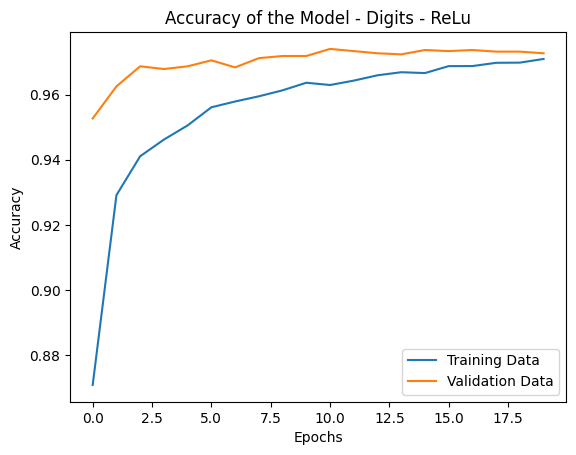

In [22]:
# Visualizing the Accuracies of the Model
relu_accuracy_digits = plt.figure()
plt.plot(history_relu_digits.history['accuracy'], label='Training Data')
plt.plot(history_relu_digits.history['val_accuracy'], label='Validation Data')
plt.title('Accuracy of the Model - Digits - ReLu')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
relu_accuracy_digits.savefig('/content/ReLu Files/MNIST Digits Files/ReLu Accuracy Plot - Digits.png')

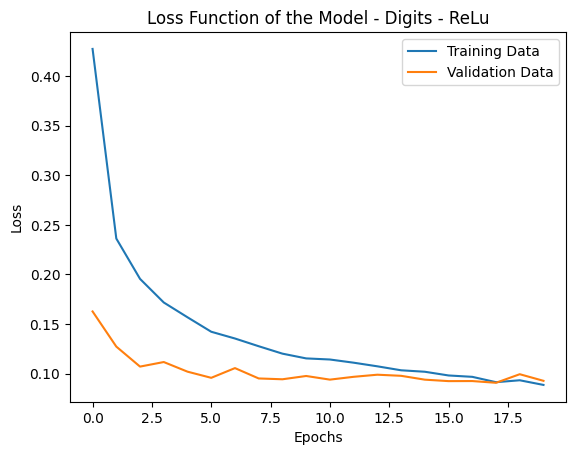

In [23]:
# Visualizing the Loss of the Model
relu_loss_digits = plt.figure()
plt.plot(history_relu_digits.history['loss'], label='Training Data')
plt.plot(history_relu_digits.history['val_loss'], label='Validation Data')
plt.title('Loss Function of the Model - Digits - ReLu')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
relu_loss_digits.savefig('/content/ReLu Files/MNIST Digits Files/ReLu Loss Function Plot - Digits.png')

In [24]:
# Evaluating the Model using Test Dataset
loss_relu_digits, accuracy_relu_digits = model_relu_digits.evaluate(x_test_digits, y_test_digits)

313/313 [==============================] - 0s 1ms/step - loss: 0.1085 - accuracy: 0.9696


In [25]:
print(loss_relu_digits)
print(accuracy_relu_digits)

0.10847194492816925
0.9696000218391418


In [26]:
test_predict_relu_digits = model_relu_digits.predict(x_test_digits)

313/313 [==============================] - 0s 1ms/step


In [27]:
# Turning the encoded labels to labels 0-9
test_predict_labels_relu_digits = [np.argmax(i) for i in test_predict_relu_digits]
test_labels_relu_digits = [np.argmax(i) for i in y_test_digits]

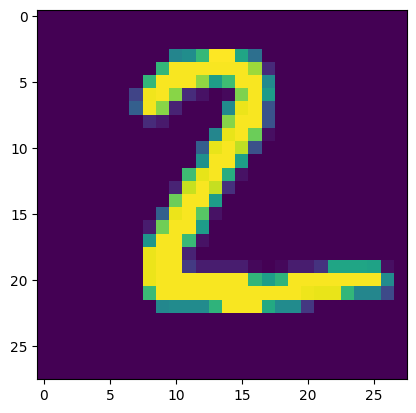

Test Label: 2
Test Predict Label: 2


In [28]:
# Checking the created labels and prediction of the model
plt.imshow(x_test_digits[1])
plt.show()
print('Test Label:', test_labels_relu_digits[1])
print('Test Predict Label:', test_predict_labels_relu_digits[1])

In [29]:
print(np.unique(test_labels_relu_digits))
print(np.unique(test_predict_labels_relu_digits))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


**Evaluating the Model using Evaluation Metrics**

In [30]:
# Confusion Matrix
cf_matrix_relu_digits = confusion_matrix(test_labels_relu_digits, test_predict_labels_relu_digits)

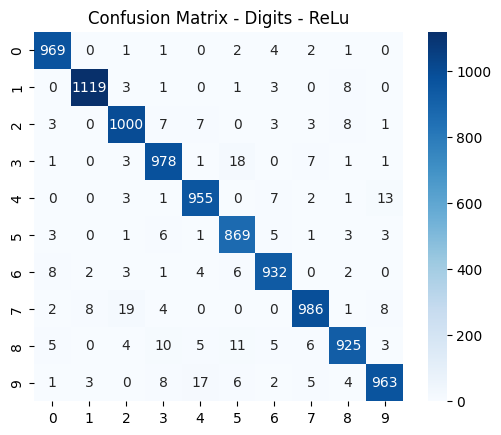

In [31]:
# Visualizing the confusion matrix
relu_digits_cfmatrix = plt.figure()
sns.heatmap(cf_matrix_relu_digits, cbar=True, square=True, fmt='d', annot=True, cmap='Blues')
plt.title('Confusion Matrix - Digits - ReLu')
plt.show()
relu_digits_cfmatrix.savefig('/content/ReLu Files/MNIST Digits Files/ReLu Confusion Matrix - Digits')

In [32]:
# Precision - False Positive
precision_score(test_labels_relu_digits, test_predict_labels_relu_digits, average='macro') # Each class --> Average

0.969225538995947

In [33]:
precision_score(test_labels_relu_digits, test_predict_labels_relu_digits, average='micro') # As a whole

0.9696

In [34]:
# Precision - False Negative
recall_score(test_labels_relu_digits, test_predict_labels_relu_digits, average='macro')

0.969481440509006

In [35]:
recall_score(test_labels_relu_digits, test_predict_labels_relu_digits, average='micro')

0.9696

In [36]:
# F1 Score - Harmonic Mean
f1_score(test_labels_relu_digits, test_predict_labels_relu_digits, average='macro')

0.9693098745485736

In [37]:
f1_score(test_labels_relu_digits, test_predict_labels_relu_digits, average='micro')

0.9696

**SUMMARY: Digits Dataset**

**(20th Epoch)**

Accuracy: 0.9709

Validation Accuracy: 0.9727

Loss: 0.0886

Validation Loss: 0.0927

**(Test Dataset Evaluation)**

Test Accuracy: 0.9696

Test Loss: 0.1085

**(Macro - Micro Evaluation)**

Precision: 0.9692 - 0.9696

Recall: 0.9694 - 0.9696

F1 Score: 0.9693 - 0.9696

## **Training the Model using CIFAR-10 Dataset**

**Building the Model/Shallow Neural Network - Grayscale Cifar - ReLu**

In [38]:
# Defining the no. of layers, neurons and activation function of each layer
model_relu_cifar = tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(32,32,3)),
                              tf.keras.layers.Dense(32, activation='relu'),
                              tf.keras.layers.Dropout(0.1),
                              tf.keras.layers.Dense(64, activation='relu'),
                              tf.keras.layers.Dropout(0.1),
                              tf.keras.layers.Dense(10, activation='softmax')
])

In [39]:
# Compiling the Model - Optimizer, Loss and Evaluation Metric
model_relu_cifar.compile(
                optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy']
)

In [40]:
# Training the Model - Cifar
history_relu_cifar = model_relu_cifar.fit(x_train_cifar, y_train_cifar, validation_split=0.1, epochs=20)

Epoch 1/20
1407/1407 [==============================] - 5s 3ms/step - loss: 2.1206 - accuracy: 0.1803 - val_loss: 2.0113 - val_accuracy: 0.2300
Epoch 2/20
1407/1407 [==============================] - 5s 4ms/step - loss: 2.0650 - accuracy: 0.2084 - val_loss: 1.9951 - val_accuracy: 0.2326
Epoch 3/20
1407/1407 [==============================] - 4s 3ms/step - loss: 2.0409 - accuracy: 0.2220 - val_loss: 2.0302 - val_accuracy: 0.2308
Epoch 4/20
1407/1407 [==============================] - 5s 4ms/step - loss: 2.0285 - accuracy: 0.2251 - val_loss: 1.9454 - val_accuracy: 0.2592
Epoch 5/20
1407/1407 [==============================] - 4s 3ms/step - loss: 2.0176 - accuracy: 0.2322 - val_loss: 1.9837 - val_accuracy: 0.2456
Epoch 6/20
1407/1407 [==============================] - 4s 3ms/step - loss: 2.0124 - accuracy: 0.2356 - val_loss: 2.0038 - val_accuracy: 0.2262
Epoch 7/20
1407/1407 [==============================] - 6s 5ms/step - loss: 2.0090 - accuracy: 0.2365 - val_loss: 1.9461 - val_accuracy:

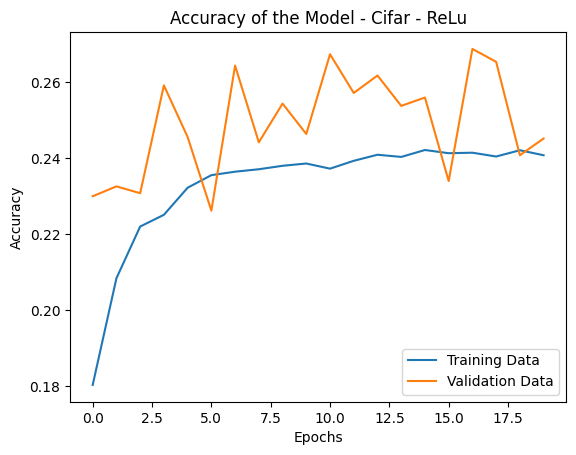

In [41]:
# Visualizing the Accuracies of the Model
relu_accuracy_cifar = plt.figure()
plt.plot(history_relu_cifar.history['accuracy'], label='Training Data')
plt.plot(history_relu_cifar.history['val_accuracy'], label='Validation Data')
plt.title('Accuracy of the Model - Cifar - ReLu')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
relu_accuracy_cifar.savefig('/content/ReLu Files/CIFAR Files/ReLu Accuracy Plot - Cifar.png')

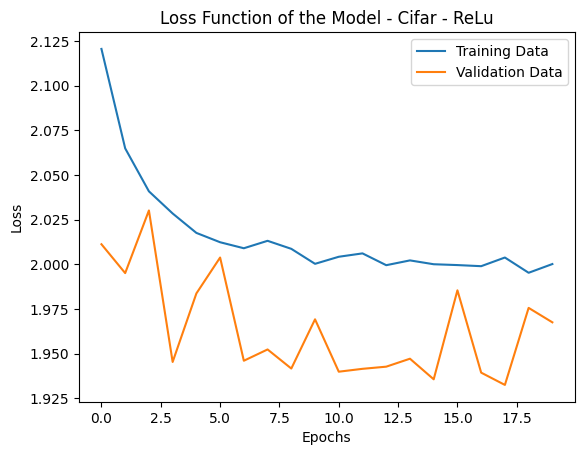

In [42]:
# Visualizing the Loss of the Model
relu_loss_cifar = plt.figure()
plt.plot(history_relu_cifar.history['loss'], label='Training Data')
plt.plot(history_relu_cifar.history['val_loss'], label='Validation Data')
plt.title('Loss Function of the Model - Cifar - ReLu')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
relu_loss_cifar.savefig('/content/ReLu Files/CIFAR Files/ReLu Loss Function Plot - Cifar.png')

In [44]:
# Evaluating the Model using Test Dataset
loss_relu_cifar, accuracy_relu_cifar = model_relu_cifar.evaluate(x_test_cifar, y_test_cifar)

313/313 [==============================] - 1s 2ms/step - loss: 1.9551 - accuracy: 0.2641


In [45]:
print(loss_relu_cifar)
print(accuracy_relu_cifar)

1.9550753831863403
0.26409998536109924


In [47]:
test_predict_relu_cifar = model_relu_cifar.predict(x_test_cifar)

313/313 [==============================] - 1s 2ms/step


In [48]:
# Turning the encoded labels to labels 0-9
test_predict_labels_relu_cifar = [np.argmax(i) for i in test_predict_relu_cifar]
test_labels_relu_cifar = [np.argmax(i) for i in y_test_digits]

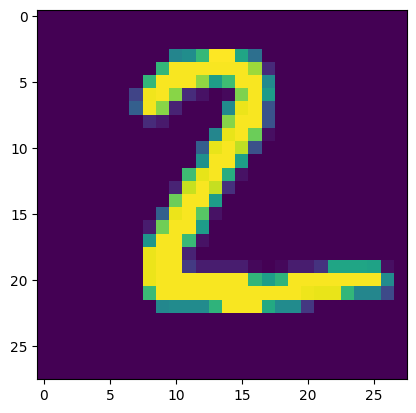

Test Label: 2
Test Predict Label: 9


In [49]:
# Checking the created labels and prediction of the model
plt.imshow(x_test_digits[1])
plt.show()
print('Test Label:', test_labels_relu_cifar[1])
print('Test Predict Label:', test_predict_labels_relu_cifar[1])

In [50]:
print(np.unique(test_labels_relu_cifar))
print(np.unique(test_predict_labels_relu_cifar))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


**Evaluating the Model using Evaluation Metrics**

In [51]:
# Confusion Matrix
cf_matrix_relu_cifar = confusion_matrix(test_labels_relu_cifar, test_predict_labels_relu_cifar)

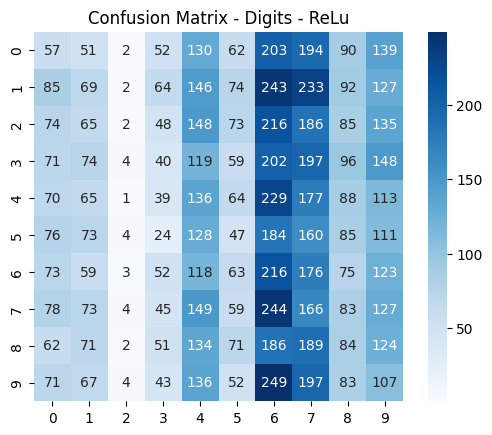

In [52]:
# Visualizing the confusion matrix
relu_cfmatrix_cifar = plt.figure()
sns.heatmap(cf_matrix_relu_cifar, cbar=True, square=True, fmt='d', annot=True, cmap='Blues')
plt.title('Confusion Matrix - Digits - ReLu')
plt.show()
relu_cfmatrix_cifar.savefig('/content/ReLu Files/CIFAR Files/ReLu Confusion Matrix - Cifar')

In [53]:
# Precision - False Positive
precision_score(test_labels_relu_cifar, test_predict_labels_relu_cifar, average='macro') # Each class --> Average

0.08890907652961554

In [54]:
precision_score(test_labels_relu_cifar, test_predict_labels_relu_cifar, average='micro') # As a whole

0.0924

In [55]:
# Precision - False Negative
recall_score(test_labels_relu_cifar, test_predict_labels_relu_cifar, average='macro')

0.09309178337006742

In [56]:
recall_score(test_labels_relu_cifar, test_predict_labels_relu_cifar, average='micro')

0.0924

In [57]:
# F1 Score - Harmonic Mean
f1_score(test_labels_relu_cifar, test_predict_labels_relu_cifar, average='macro')

0.08194741640922767

In [58]:
f1_score(test_labels_relu_cifar, test_predict_labels_relu_cifar, average='micro')

0.09239999999999998

**SUMMARY: Cifar Dataset**

**(20th Epoch)**

Accuracy: 0.2408

Validation Accuracy: 0.2452

Loss: 2.0002

Validation Loss: 1.9676

**(Test Dataset Evaluation)**

Test Accuracy: 0.2641

Test Loss: 1.9551

**(Macro - Micro Evaluation)**

Precision: 0.0889 - 0.0924

Recall: 0.0930 - 0.0924

F1 Score: 0.0819 - 0.0923

# **Another Activation Function**